In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv('/content/sample_data/data.csv')

In [3]:
df.head()

,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,text,hashtags
0,Serkan Hicranlı,NaN,120,841,546,False,@harari_yuval what do you think about #TheSoci...,['TheSocialDilemma']
1,Laura,Kent,696,444,10551,False,Erm #TheSocialDilemma makes me want to go off ...,['TheSocialDilemma']
2,Eugene🍫,South Africa,2180,1570,18692,False,"#TheSocialDilemma is not a documentary, it's h...",['TheSocialDilemma']
3,RYAN,"Dallas, TX",5011,2422,619,False,Okay i’m watching #TheSocialDilemma now.,['TheSocialDilemma']
4,Priyal,सौरमंडल,124,180,2605,False,"Okey okey, I’ve been peer pressured into watch...",['TheSocialDilemma']


In [4]:
df_text = df.iloc[:,6:7]
df_text.head()

,text
0,@harari_yuval what do you think about #TheSoci...
1,Erm #TheSocialDilemma makes me want to go off ...
2,"#TheSocialDilemma is not a documentary, it's h..."
3,Okay i’m watching #TheSocialDilemma now.
4,"Okey okey, I’ve been peer pressured into watch..."


In [5]:
# used NLP for Text Data
# used to remove stopwords, clean the text like changing to lowercase, remove spaces
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,len(df_text)):
  review = re.sub('[^a-zA-Z]', ' ', df_text['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()  
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus[3]

'okay watch thesocialdilemma'

In [7]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
df_text_new = cv.fit_transform(corpus).toarray()

In [8]:
df_text_new.shape

(24, 141)

In [9]:
# Creating a new DF that contains the vectorized words
df_text_pd = pd.DataFrame(df_text_new, columns=cv.get_feature_names())
df_text_pd.head()

,addict,ahead,ambassador,amp,anyth,aqhtcoqr,attack,award,bac,bank,big,biggesthop,blacklivesmatt,blackpressday,caught,cave,christmasaftermath,cn,co,cocacola,collud,control,day,daywithoutimmigr,documentari,elimin,end,erm,especi,europ,face,feel,final,flag,game,gentleman,get,global,go,goalkeep,...,score,sec,see,send,sens,shoot,sinc,social,spain,speak,stage,strong,stronger,take,terrorist,texasjihad,thesocialdilemma,think,three,time,tinfoil,tonight,tr,tri,trump,turn,two,unicef,vs,want,war,watch,wave,way,win,worldcup,xyzl,ychecgxoti,year,yuval
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [10]:
df_text_pd.shape

(24, 141)

In [11]:
df_hashtag = df.iloc[:,7:8]
df_hashtag.head()

,hashtags
0,['TheSocialDilemma']
1,['TheSocialDilemma']
2,['TheSocialDilemma']
3,['TheSocialDilemma']
4,['TheSocialDilemma']


In [12]:
# used NLP for HashTag Data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0,len(df_hashtag)):
  review = re.sub('[^a-zA-Z]', ' ', df_hashtag['hashtags'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()  
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus1.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus1[5]

'thesocialdilemma'

In [14]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100)
df_hashtag_new = cv.fit_transform(corpus1).toarray()

In [15]:
df_hashtag_new.shape

(24, 26)

In [16]:
df_hashtag_pd = pd.DataFrame(df_hashtag_new, columns=cv.get_feature_names())
df_hashtag_pd.head()

,biggesthop,blacklivesmatt,bramex,christmasaftermath,croden,daywithoutimmigr,eng,fifastadiumdj,islamkil,manofthematch,mlb,nba,nfl,nhl,obama,pga,polit,por,powerbyexo,russia,sportstalk,sportstalkradio,texasjihad,thesocialdilemma,worldcup,xiuminleagu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df_hashtag_pd.shape

(24, 26)

In [18]:
# Concatenate both the dataframe ie, text and hashtag
X = pd.concat([df_text_pd, df_hashtag_pd], axis=1)
X.head()

,addict,ahead,ambassador,amp,anyth,aqhtcoqr,attack,award,bac,bank,big,biggesthop,blacklivesmatt,blackpressday,caught,cave,christmasaftermath,cn,co,cocacola,collud,control,day,daywithoutimmigr,documentari,elimin,end,erm,especi,europ,face,feel,final,flag,game,gentleman,get,global,go,goalkeep,...,two,unicef,vs,want,war,watch,wave,way,win,worldcup,xyzl,ychecgxoti,year,yuval,biggesthop,blacklivesmatt,bramex,christmasaftermath,croden,daywithoutimmigr,eng,fifastadiumdj,islamkil,manofthematch,mlb,nba,nfl,nhl,obama,pga,polit,por,powerbyexo,russia,sportstalk,sportstalkradio,texasjihad,thesocialdilemma,worldcup,xiuminleagu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


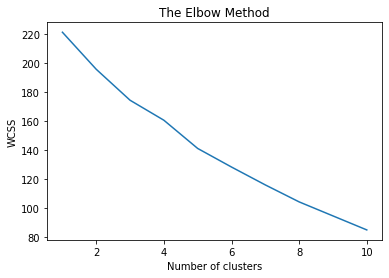

In [19]:
# Implementing K-Means++
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

In [21]:
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    15
1     4
3     2
0     2
4     1
Name: cluster, dtype: int64

In [22]:
pred

array([2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 2, 2, 0, 2, 4, 2, 2, 2, 1, 1, 1,
       2, 1], dtype=int32)

In [23]:
# append the cluster no to the original dataframe
df['Label'] = pd.Series(pred, index=df.index)

In [24]:
df

,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,text,hashtags,Label
0,Serkan Hicranlı,NaN,120,841,546,False,@harari_yuval what do you think about #TheSoci...,['TheSocialDilemma'],2
1,Laura,Kent,696,444,10551,False,Erm #TheSocialDilemma makes me want to go off ...,['TheSocialDilemma'],2
2,Eugene🍫,South Africa,2180,1570,18692,False,"#TheSocialDilemma is not a documentary, it's h...",['TheSocialDilemma'],2
3,RYAN,"Dallas, TX",5011,2422,619,False,Okay i’m watching #TheSocialDilemma now.,['TheSocialDilemma'],2
4,Priyal,सौरमंडल,124,180,2605,False,"Okey okey, I’ve been peer pressured into watch...",['TheSocialDilemma'],2
5,Laura Spoonie 🌻♿,United Kingdom,2876,1443,34032,False,When you put on a documentary speaking about h...,['TheSocialDilemma'],2
6,Steven Rice,"Coventry, England",4,178,374,False,Only two goalkeepers have saved three penaltie...,"WorldCup,POR,ENG",3
7,The Social Dilemma,NaN,7644,66,122,False,scores the winning penalty to send into the qu...,WorldCup,2
8,Michael Gbadebo FRSA,United Kingdom,75,0,16,False,Tonight we have big game,worldcup,2
9,Barbara Chesire-Chabbaga,"Nairobi, Kenya",858,616,2290,False,We get stronger Turn the music up now We got t...,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",0
